#CUSTOMER CHURN PREDICTION

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# to upload the kaggle.json file:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akashilay","key":"4b492ff0abe2f5cacdffcb47c8bf1def"}'}

In [3]:
# Download the dataset
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction
License(s): other
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 79.5MB/s]


In [4]:
!unzip bank-customer-churn-prediction.zip

Archive:  bank-customer-churn-prediction.zip
  inflating: Churn_Modelling.csv     


In [5]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

In [6]:
# Display basic information and the first few rows
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [7]:
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

##Data Preprocessing and EDA

In [8]:
# Dropping RowNumber,CustomerID,Surname
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace = True)

In [9]:
# Checking for null values
null_values = df.isnull().sum().sum()
print(f"Number of Null values : {null_values}")

Number of Null values : 0


In [10]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [11]:
df["Tenure"].value_counts().values

array([1048, 1035, 1028, 1025, 1012, 1009,  989,  984,  967,  490,  413])

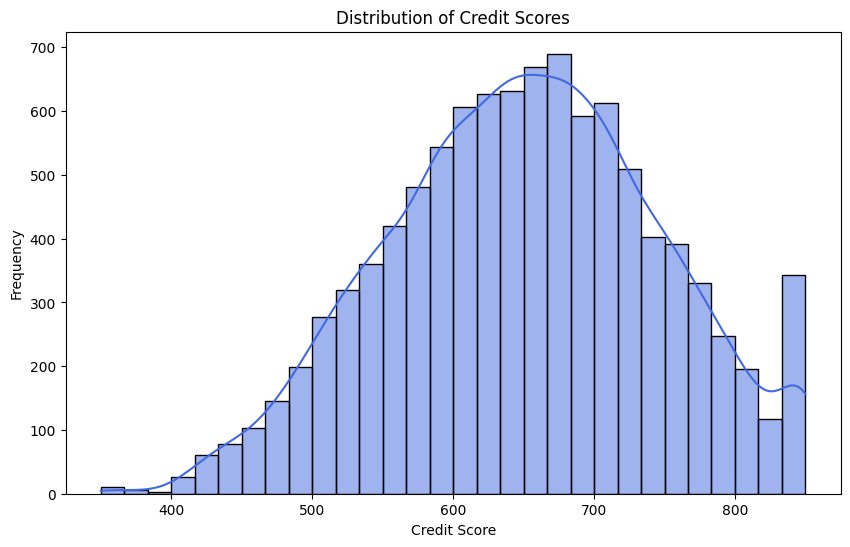

In [12]:
# Disribution of Credit Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['CreditScore'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

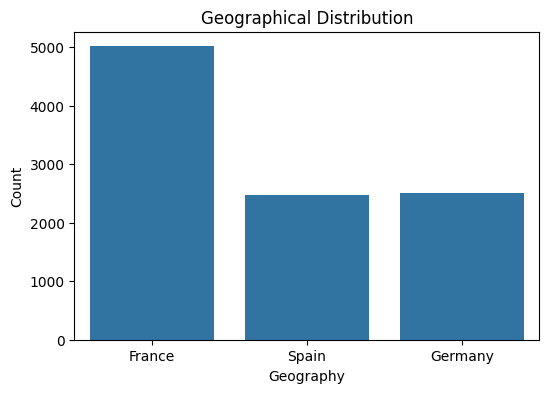

In [24]:
# Geographical Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Geography')
plt.title('Geographical Distribution')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

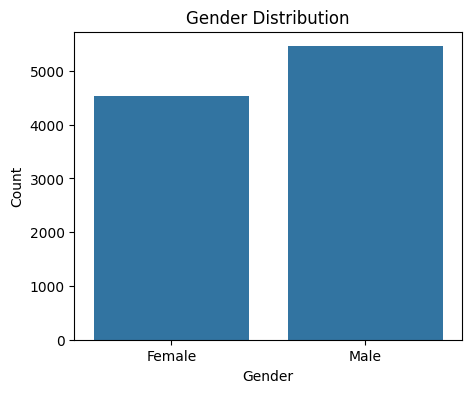

In [23]:
# Gender Distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

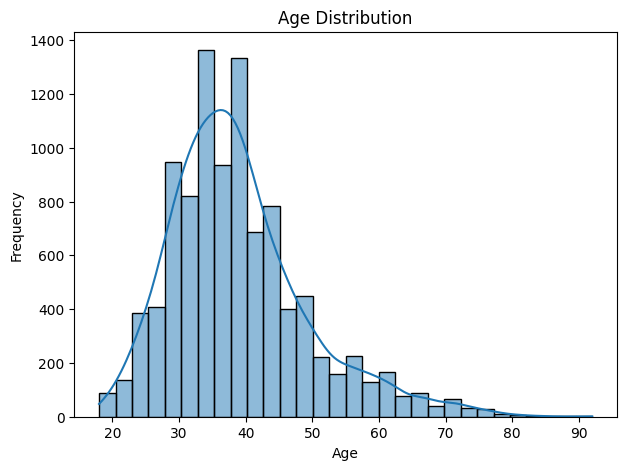

In [27]:
# Age Distribution
plt.figure(figsize=(7,5))
sns.histplot(data = df,x="Age",kde = True,bins = 30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

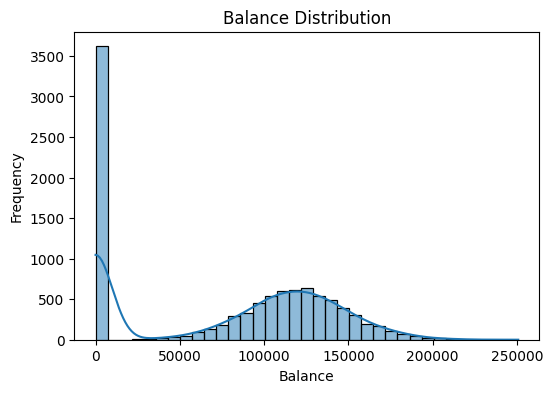

In [28]:
# Balance Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Balance'], bins=35, kde=True)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

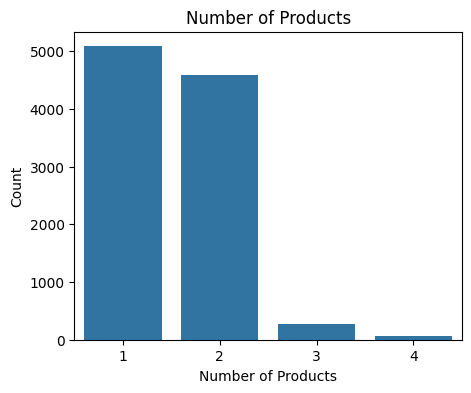

In [29]:
#Number of Products
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='NumOfProducts')
plt.title('Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

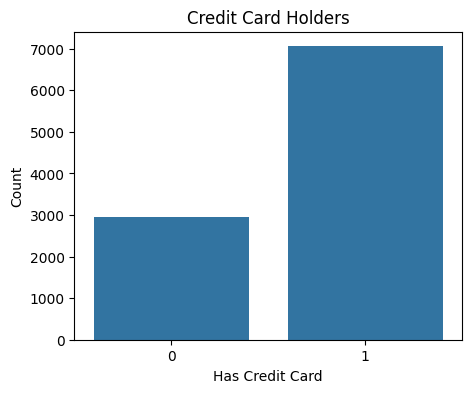

In [30]:
#Credit Card Holders
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='HasCrCard')
plt.title('Credit Card Holders')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.show()

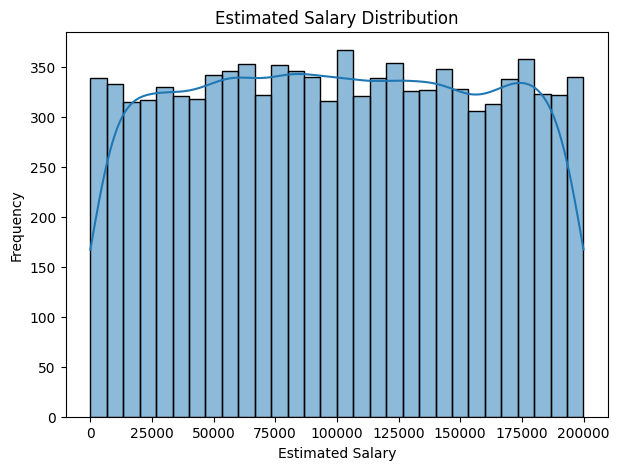

In [32]:
# Estimated Salary Distribution
plt.figure(figsize=(7,5))
sns.histplot(df['EstimatedSalary'], bins=30, kde=True)
plt.title('Estimated Salary Distribution')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

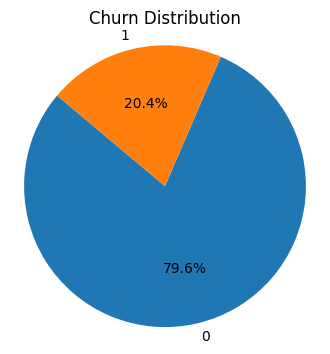

In [33]:
churn_counts = df['Exited'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

In [34]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [35]:
# Split the data into features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

In [36]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Model Training and Evaluation

In [38]:
from sklearn.linear_model import LogisticRegression
# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [39]:
# Predict on the test set
lr_y_pred = lr_model.predict(X_test)

In [40]:
# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_y_pred)*100)
print(classification_report(y_test, lr_y_pred))

Logistic Regression Accuracy: 81.5
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [41]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

In [43]:
# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred)*100)
print(classification_report(y_test, rf_y_pred))

Random Forest Accuracy: 86.4
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

